In [5]:
from ldm.data.audio_landscape import AudioTrain
from torch.utils.data import DataLoader
import os
import numpy as np

import torch

In [6]:
ckpt_path = "logs/2022-09-28T20-39-59_lsun_churches-ldm-kl-8/checkpoints/last.ckpt"

a = torch.load(ckpt_path)

In [12]:
type(a["state_dict"])

collections.OrderedDict

In [13]:
a["state_dict"].keys()

odict_keys(['betas', 'alphas_cumprod', 'alphas_cumprod_prev', 'sqrt_alphas_cumprod', 'sqrt_one_minus_alphas_cumprod', 'log_one_minus_alphas_cumprod', 'sqrt_recip_alphas_cumprod', 'sqrt_recipm1_alphas_cumprod', 'posterior_variance', 'posterior_log_variance_clipped', 'posterior_mean_coef1', 'posterior_mean_coef2', 'scale_factor', 'model.diffusion_model.input_proj.proj.0.weight', 'model.diffusion_model.input_proj.proj.0.bias', 'model.diffusion_model.output_proj.proj.0.weight', 'model.diffusion_model.output_proj.proj.0.bias', 'model.diffusion_model.encoderlayer_0.time_embed.0.weight', 'model.diffusion_model.encoderlayer_0.time_embed.0.bias', 'model.diffusion_model.encoderlayer_0.time_embed.2.weight', 'model.diffusion_model.encoderlayer_0.time_embed.2.bias', 'model.diffusion_model.encoderlayer_0.blocks.0.norm1.weight', 'model.diffusion_model.encoderlayer_0.blocks.0.norm1.bias', 'model.diffusion_model.encoderlayer_0.blocks.0.attn.relative_position_bias_table', 'model.diffusion_model.encoderl

In [8]:
type(a['model_state_dict'])

KeyError: 'model_state_dict'

In [2]:
# dt_audio = AudioTrain()
# dt_audio
dt_audio = AudioTrain()


In [4]:
dt_audio = AudioTrain()
dl_audio = DataLoader(dt_audio, batch_size=8, shuffle=False, num_workers=0)

for ind, item in enumerate(dl_audio):
    if ind % 5 == 0:
        print(ind)
#         print()
#     if ind >= 3:
#         break
    
#     print()
#     print(item['audio'].shape)
# #     print(item['audio'].max())

#     print("******")
    

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110


In [3]:
aud_root = "/kuacc/users/bbiner21/Github/audioset-processing/audio_10s_npy/"
audio_data_paths = "data/landscape/audio_train.txt"

with open(audio_data_paths, "r") as af:
    audio_paths = af.read().splitlines() 

a_files = [os.path.join(aud_root, l)
                           for l in audio_paths]
    

In [11]:
for f in dt_audio.labels["audio_file_path_"]:
    path = f
    temp = np.load(f,allow_pickle=True)


In [8]:
a = dt_audio.__getitem__(720)

/kuacc/users/bbiner21/Github/audioset-processing/audio_10s_npy/glC1fpVTsRk.npy
(315392, 2)
125608


In [9]:
np.sum(a["audio"])

167796.0

In [14]:
pad_amount = 125608 

In [15]:
track = a["audio"]

In [16]:
track = np.pad(track,((0,pad_amount),(0,0)),'constant')


In [17]:
track.shape

(441000, 2)

In [7]:
a["audio"].shape

(315392, 2)

In [3]:
# for i in range(len(dt_audio)):
#     print(i)

In [ ]:
a_files -

In [3]:
for f in a_files:
    temp = np.load(f,allow_pickle=True)

In [3]:
import sys
sys.path.append('../AudioCLIP')

# print(sys.path)
from model import AudioCLIP
from utils_audioclip.transforms import ToTensor1D

ModuleNotFoundError: No module named 'ignite'

In [8]:
import pathlib

In [15]:
path = "/kuacc/users/bbiner21/Github/CIFAR-10-images/train"
path2 = "/kuacc/users/bbiner21/Github/CIFAR-10-images/train/airplane"


In [16]:
path = pathlib.Path(path2)
files = list(path.glob('*.jpg')) + list(path.glob('*.png'))

In [18]:
files[0]

PosixPath('/kuacc/users/bbiner21/Github/CIFAR-10-images/train/airplane/1883.jpg')

In [11]:
path = pathlib.Path(path)
files = list(path.rglob('*.jpg')) + list(path.rglob('*.png'))

In [12]:
len(files)

50000

In [14]:
type(files[0])

pathlib.PosixPath

In [1]:
from ldm.data.lsun import LSUNChurchesTrain
from torch.utils.data import DataLoader

from ldm.data.cifar_dataset import CifarTrain

In [2]:
dt_cifar = CifarTrain()
dl_cifar = DataLoader(dt_cifar, batch_size=8, shuffle=True)

1.0
-1.0


In [3]:
for ind, item in enumerate(dl_cifar):
    if ind >= 3:
        break
    
    print(ind)
    print(item['image'].min())
    print(item['image'].max())

    print("******")


0
tensor(-1.)
tensor(1.)
******
1
tensor(-0.9922)
tensor(1.)
******
2
tensor(-1.)
tensor(1.)
******


In [4]:
dt = LSUNChurchesTrain()

In [5]:
type(dt)

ldm.data.lsun.LSUNChurchesTrain

In [6]:
dl = DataLoader(dt, batch_size=8, shuffle=True)

In [9]:
for ind, item in enumerate(dl):
    if ind >= 3:
        break
    print(item['image'].max())
    print("******")
    print(ind)


tensor(1.)
******
0
tensor(1.)
******
1
tensor(1.)
******
2


In [1]:
import numpy as np
from six.moves import cPickle as pickle
import os
import platform


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)


def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000,data_dir="/datasets/cifar/cifar-10-batches-py"):
    
    # Load the raw CIFAR-10 data
    cifar10_dir = data_dir
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test


In [3]:
path = "/datasets/cifar/cifar-10-batches-py/data_batch_1"

In [6]:
# f = np.load(path)
# m, s = f['mu'][:], f['sigma'][:]
# f.close()

In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


In [5]:
type(x_train)

numpy.ndarray

In [14]:
image = x_train[3,:]

In [17]:
x_train.shape

(49000, 3072)

In [19]:
new_x_train = (x_train.reshape(x_train.shape[0],3,32,32)).transpose(0,2,3,1)


In [21]:
new_x_train.shape

(49000, 32, 32, 3)

In [15]:
image = image.reshape(3,32,32)
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


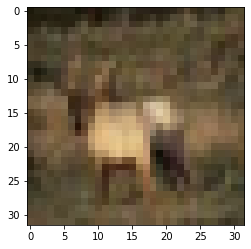

In [22]:
import matplotlib.pyplot as plt

plt.imshow(new_x_train[3,:])
# plt.title(label_name[label])

In [30]:
from PIL import Image

In [54]:
# w, h = 512, 512
# data = np.zeros((h, w, 3), dtype=np.uint8)
# data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(image*255, 'RGB')
img.save('my.png')
img.show()

START /usr/bin/eog "/tmp/tmp3v5gwbir.PNG"



(eog:101174): Gtk-WARNING **: 15:22:57.479: cannot open display: 
xdg-open: no method available for opening '/tmp/tmp3v5gwbir.PNG'


In [36]:
np.max(image*256)

256.0